In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_PATH = "/content/gdrive/MyDrive/projectAI/"

PRICE_TYPE = "midPrice/"
DATA_TYPE = "kBestTaNormalizedData/"
LABELING_STRATEGY = "labelingStrategy1/"
IMAGE_TYPE = "mtfImages/"

PATH_LABELS = ROOT_PATH + PRICE_TYPE + DATA_TYPE + LABELING_STRATEGY
PATH_IMAGES = PATH_LABELS + IMAGE_TYPE
PATH_TRAIN_IMAGES = PATH_IMAGES + "Train"
PATH_TEST_IMAGES = PATH_IMAGES + "Test"
PATH_TRAIN_LABELS = PATH_LABELS + "y_train.csv"
PATH_TEST_LABELS = PATH_LABELS + "y_test.csv"

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math

In [ ]:
import os
import sys
os.chdir(ROOT_PATH)
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/MyDrive/projectAI
/content/gdrive/MyDrive/projectAI


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (80, 80))
            images.append(img)
    return images

In [ ]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.show()

In [ ]:
x_train_images = load_images_from_folder(PATH_TRAIN_IMAGES)
x_test_images = load_images_from_folder(PATH_TEST_IMAGES)

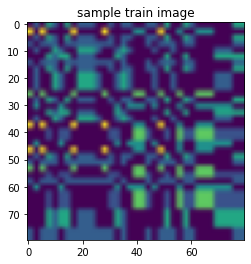

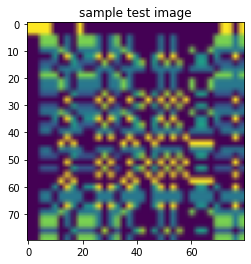

In [ ]:
plt_imshow("sample train image", x_train_images[0])
plt_imshow("sample test image", x_test_images[0])

In [ ]:
y_train_df = pd.read_csv(PATH_TRAIN_LABELS)     
y_test_df = pd.read_csv(PATH_TEST_LABELS)

In [ ]:
x_train_images = np.array(x_train_images)
x_test_images = np.array(x_test_images)
y_train = np.uint8(y_train_df["y_train"].to_numpy())
y_test = np.uint8(y_test_df["y_test"].to_numpy())

In [ ]:
print("x_train_images.shape: ", x_train_images.shape)
print("x_test_images.shape: ", x_test_images.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

x_train_images.shape:  (1588, 80, 80, 3)
x_test_images.shape:  (398, 80, 80, 3)
y_train.shape:  (1588,)
y_test.shape:  (398,)


In [ ]:
# ARCH - 1
LR = 0.001
cnn = tf.keras.models.Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(x_train_images[0].shape)),
            MaxPooling2D((2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, kernel_size=(3, 3), strides=3, padding='same', activation='relu'),
            Flatten(),
            Dense(3, activation='softmax')]
        )
cnn.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train_images, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 13s 244ms/step - loss: 4.6305 - accuracy: 0.3268
Epoch 2/10
50/50 [==============================] - 12s 241ms/step - loss: 1.0927 - accuracy: 0.3678
Epoch 3/10
50/50 [==============================] - 12s 240ms/step - loss: 1.0847 - accuracy: 0.3936
Epoch 4/10
50/50 [==============================] - 12s 241ms/step - loss: 1.0756 - accuracy: 0.4232
Epoch 5/10
50/50 [==============================] - 12s 240ms/step - loss: 1.0592 - accuracy: 0.4484
Epoch 6/10
50/50 [==============================] - 12s 240ms/step - loss: 1.0448 - accuracy: 0.4515
Epoch 7/10
50/50 [==============================] - 12s 239ms/step - loss: 1.0186 - accuracy: 0.4937
Epoch 8/10
50/50 [==============================] - 12s 241ms/step - loss: 0.9809 - accuracy: 0.5145
Epoch 9/10
50/50 [==============================] - 12s 240ms/step - loss: 0.9557 - accuracy: 0.5208
Epoch 10/10
50/50 [==============================] - 12s 241ms/step - loss: 0.9253 - accura

In [ ]:
y_pred = cnn.predict(x_test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.304     0.276     0.289       123
           1      0.373     0.404     0.388       156
           2      0.342     0.336     0.339       119

    accuracy                          0.344       398
   macro avg      0.339     0.339     0.339       398
weighted avg      0.342     0.344     0.343       398



In [ ]:
# ARCH - 2
LR = 0.001
cnn = tf.keras.models.Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(x_train_images[0].shape)),
            MaxPooling2D((2, 2)),
            Conv2D(32, kernel_size=(3, 3), activation='relu'),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(128, kernel_size=(3, 3), strides=3, padding = 'same', activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Flatten(),
            Dense(3, activation='softmax')]
        )
cnn.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train_images, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 28s 553ms/step - loss: 2.3000 - accuracy: 0.3596
Epoch 2/10
50/50 [==============================] - 28s 552ms/step - loss: 2.1437 - accuracy: 0.3797
Epoch 3/10
50/50 [==============================] - 28s 552ms/step - loss: 2.1047 - accuracy: 0.4074
Epoch 4/10
50/50 [==============================] - 28s 553ms/step - loss: 1.8666 - accuracy: 0.4427
Epoch 5/10
50/50 [==============================] - 28s 551ms/step - loss: 1.7699 - accuracy: 0.4307
Epoch 6/10
50/50 [==============================] - 28s 551ms/step - loss: 1.6442 - accuracy: 0.4440
Epoch 7/10
50/50 [==============================] - 28s 553ms/step - loss: 1.7556 - accuracy: 0.4679
Epoch 8/10
50/50 [==============================] - 28s 552ms/step - loss: 1.7464 - accuracy: 0.4767
Epoch 9/10
50/50 [==============================] - 28s 553ms/step - loss: 1.8197 - accuracy: 0.4622
Epoch 10/10
50/50 [==============================] - 28s 553ms/step - loss: 1.4907 - accura

In [ ]:
y_pred = cnn.predict(x_test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.194     0.049     0.078       123
           1      0.388     0.878     0.538       156
           2      0.429     0.050     0.090       119

    accuracy                          0.374       398
   macro avg      0.337     0.326     0.235       398
weighted avg      0.340     0.374     0.262       398



In [ ]:
# ARCH - 3
LR = 0.001
cnn = tf.keras.models.Sequential([
                                  
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(x_train_images[0].shape)),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), strides=3, padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.4),

            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), strides=3, padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.4),

            Conv2D(128, kernel_size=4, activation='relu'),
            BatchNormalization(),
            Flatten(),
            Dropout(0.4),
            Dense(3, activation='softmax')]
        )
cnn.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train_images, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 39s 769ms/step - loss: 1.9549 - accuracy: 0.3249
Epoch 2/10
50/50 [==============================] - 38s 770ms/step - loss: 1.7270 - accuracy: 0.3804
Epoch 3/10
50/50 [==============================] - 38s 769ms/step - loss: 1.4781 - accuracy: 0.4238
Epoch 4/10
50/50 [==============================] - 39s 777ms/step - loss: 1.4553 - accuracy: 0.4213
Epoch 5/10
50/50 [==============================] - 39s 774ms/step - loss: 1.3207 - accuracy: 0.4603
Epoch 6/10
50/50 [==============================] - 39s 774ms/step - loss: 1.3625 - accuracy: 0.4553
Epoch 7/10
50/50 [==============================] - 39s 771ms/step - loss: 1.3926 - accuracy: 0.4572
Epoch 8/10
50/50 [==============================] - 39s 773ms/step - loss: 1.3255 - accuracy: 0.4647
Epoch 9/10
50/50 [==============================] - 39s 772ms/step - loss: 1.1760 - accuracy: 0.5088
Epoch 10/10
50/50 [==============================] - 39s 771ms/step - loss: 1.0840 - accura

In [ ]:
y_pred = cnn.predict(x_test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.189     0.081     0.114       123
           1      0.393     0.577     0.468       156
           2      0.336     0.328     0.332       119

    accuracy                          0.349       398
   macro avg      0.306     0.329     0.304       398
weighted avg      0.313     0.349     0.318       398



In [ ]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 86, 86, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_60 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_61 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 flatten_10 (Flatten)        (None, 6400)            